# Neutron Detection and Moderation


### Introduction
* This 'Jupyter Notebook' is your manual, data analysis and log book all at the same time. It consists of individual cells of text or Python code and you can edit or add cells to your heart's content.
* When using the notebook, there are two modes: *command* and *edit* mode. In command mode, you can add, move, run or delete cells. In edit mode, you modify its content. Use the *Esc* key or click outside the cell to leave edit mode. With *shift* + *return* you can run it directly from edit mode.
* When you 'run' a cell it will either be formated or executed depending on whether it is a text cell or a code cell, respectivly. The output will be shown inside the notebook.
* It is best to run the notebook piece-by-piece as we are progressing through the lab. If something doesn't work as expected, try 'Kernel->Restart' to get a fresh working environment.
* Code cells support typical editing features of an IDE, such as tab-complete. You find more info in the 'Help' menu including all keyboard shortcuts!
* **Please note**: The code is not supposed to work out-of-the-box but needs some tweaks from your side to complete all the way through! So if you encounter an error, don't despair, try to fix it and ask for help should you get stuck!
* **Tip**: If you enable line numbers for code cells in the menu (View->Toggle Line Numbers) it will be easier to discuss changes with your colleagues!


### Importing python packages <a name="import"></a>

In [1]:
#This code cell holds useful code needed for the analysis. Execute it like normal.
# Packages to help importing files 
import sys, os
sys.path.append('./lib')

# Package that supports working with large arrays
import numpy as np  

# Package for plotting 
import matplotlib   # choose a backend for web applications; remove for stand-alone applications:
matplotlib.use('Agg') # enable interactive notebook plots (alternative: use 'inline' instead of 'notebook'/'widget' for static images)
%matplotlib widget

# The following line is the ONLY one needed in stand-alone applications!
import matplotlib.pyplot as plt

# Function that fits a curve to data 
from scipy.optimize import curve_fit

# Custom pakages prepared for you to analyze experimental data from labs.
# The code is located in the 'lib' subfolder which we have to specify:
sys.path.append('./lib')
import MCA, fittingFunctions

--------------------------------------------------------------------------------------------------------------

# Pre-Settings

In [2]:
### NO NEED TO EDIT ###

### Variables that are common for all analysis ###
scale = 200 # for visualization, scale is equivalent to 100% 

#  Measurement 1- Base measurement<a name="load"></a>
## Task 1 Read in base measurements and calibrate

Read in experimental data:

In [3]:
#Load your data files here:
data_detector1 = MCA.load_spectrum("./data/detector1_base.Spe") #-> TODO <- Insert the name of your data file detector1
data_detector2 = MCA.load_spectrum("./data/detector2_base.Spe") #-> TODO <- Insert the name of your data file detector2

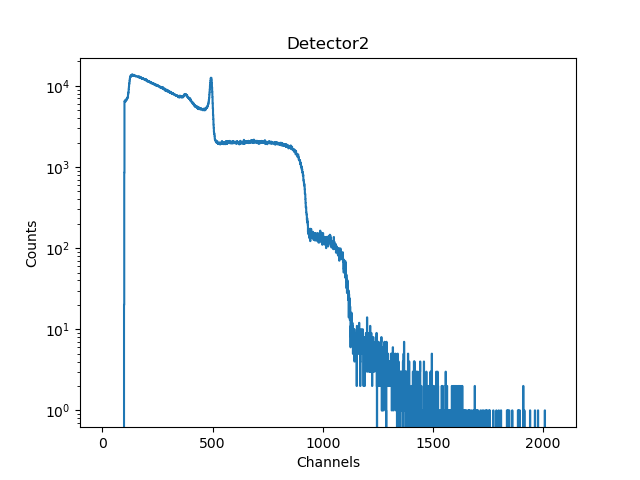

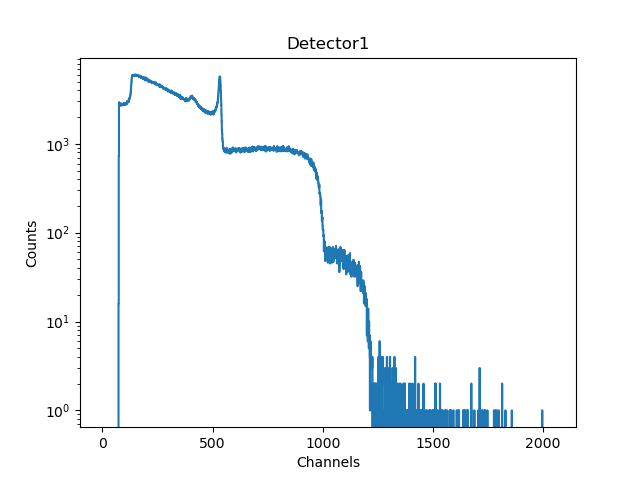

In [4]:
#Execute this cell to plot your data

#### NO NEED TO EDIT ####

plt.figure()
plt.step(data_detector1.bin_centers, data_detector1.counts, where='mid')

plt.title("Detector1") # set title of the plot
plt.xlabel("Channels")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 
plt.yscale('log')

plt.figure()
plt.step(data_detector2.bin_centers, data_detector2.counts, where='mid')

plt.title("Detector2") # set title of the plot
plt.xlabel("Channels")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 
plt.yscale('log')
plt.show()

#plt.savefig("test_spectrum.png") # This is how you save the figure. Change the extension for different file types such as pdf or png.

### Task 1.2 Energy calibration of the detectors:

Recall that the energy calibration is the linear dependence between the ADC channel number and energies of full-energy peaks of a spectrum. It should be performed with a linear regression. Therefore, the idea behind it can be expressed as: 

\begin{equation*}
Energy = k \cdot channel + m  
\end{equation*}

where $Energy$ is characteristic electron energy for a source and can be found from the data sheet, $channel$ is a channel number that corresponds to a peak centroid of uncalibrated spectrum, $k$ and $m$ are calibration constants. 

In [5]:
### Insert CHANNELS for the Detector1 
detector1_peak = 533         ### ToDo - insert value of the peak
detector1_ch_edge1 = 992     ### ToDo - insert value of the mid-point of the slope of the first edge 
detector1_ch_edge2 = 1210     ### ToDo - insert value of the mid-point of the slope of the second edge 

### Insert CHANNELS for the Detector2
detector2_peak = 493         ### ToDo - insert value of the peak
detector2_ch_edge1 = 924      ### ToDo - insert value of the mid-point of the slope of the first edge 
detector2_ch_edge2 = 1124     ### ToDo - insert value of the mid-point of the slope of the second edge  


### NO NEED TO EDIT ###
channels_1 = np.array([detector1_peak, detector1_ch_edge1, detector1_ch_edge2]) 
channels_2 = np.array([detector2_peak, detector2_ch_edge1, detector2_ch_edge2])

channels_empty = np.row_stack(([channels_1, channels_2]))
channels_empty

array([[ 533,  992, 1210],
       [ 493,  924, 1124]])

In [6]:
energy = np.array([0.76, 1.47, 1.77 ]) ### # -> TODO <- Insert the energies of the peak (Q value of reaction n+3He) and two edges (kinetic energy of alpha particle from rection going to excited state of 7Li,kinetic energy of alpha particle from rection going to ground state of 7Li)

A linear function looks like:
$$Energy = k \cdot Channel + m$$
where;
- $k$ determines the slope of the curve,
- $m$ determined the intersection of the y-axis.

Estimates for Detector1: k = 0.0015 and  m = -0.0345


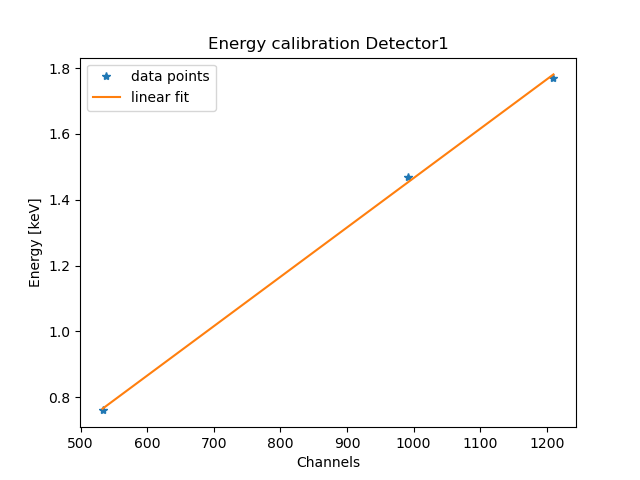

Estimates for Detector2: k = 0.0016 and  m = -0.0287


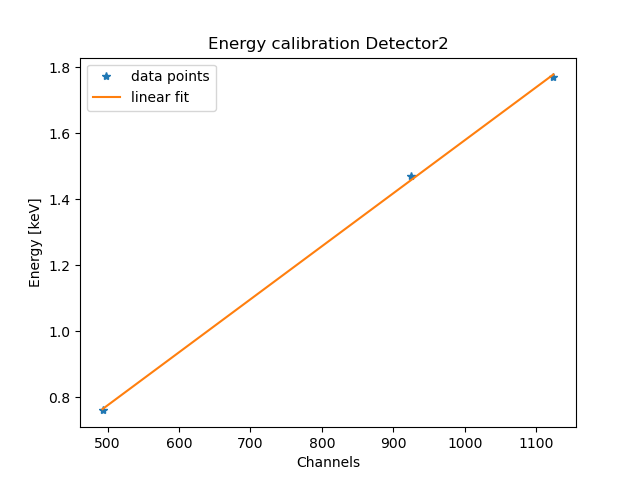

In [7]:
#Execute to find calibration coefficients for the two detectors.

#### NO NEED TO EDIT ####

k_arr = []
m_arr = []

### 2. the function
def LineFunc(x, k, m):
    return k*x+m

for i, channels in enumerate(channels_empty):

    ### 3. our intial guess 
    guess = [2, # k
             1] # m

    ### 4. now we can perform the fit using curve_fit:
    estimates, covar_matrix = curve_fit(LineFunc,
                                    channels,
                                    energy,
                                    p0 = guess)

    k_arr.append(estimates[0]) # unpack our values 
    m_arr.append(estimates[1]) # unpack our values 

    print("Estimates for Detector{}: k = {:.4f} and  m = {:.4f}".format(i+1, k_arr[i], m_arr[i]))

    ### Plot your Gaussian fit
    plt.figure()
    plt.plot(channels, energy, linestyle="", marker="*", label='data points')
    plt.plot(channels, LineFunc(channels, k_arr[i], m_arr[i]), label='linear fit')
    plt.legend(loc='upper left')
    plt.title("Energy calibration Detector{}".format(i+1)) # set title of the plot
    plt.xlabel("Channels")     # set label for x-axis 
    plt.ylabel("Energy [keV]")       # set label for y-axis 
    plt.show()

In [8]:
#Execute to calibrate from channels to Energy [keV]

#### NO NEED TO EDIT ####
data_detector1.calibrate( k_arr[0], m_arr[0]) ### calibrate Detector1
data_detector2.calibrate( k_arr[1], m_arr[1]) ### calibrate Detector2
#########################

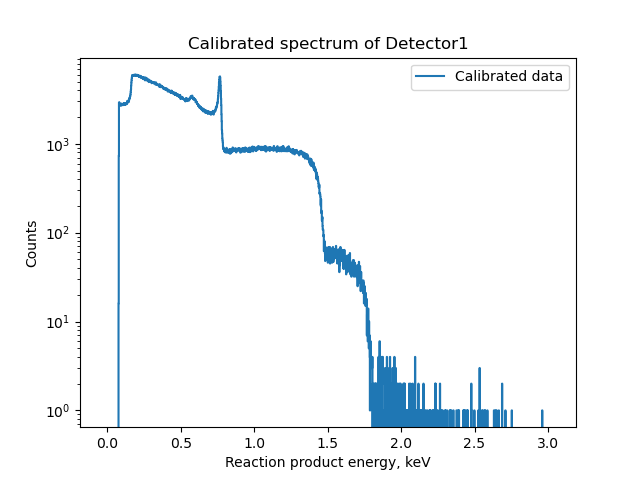

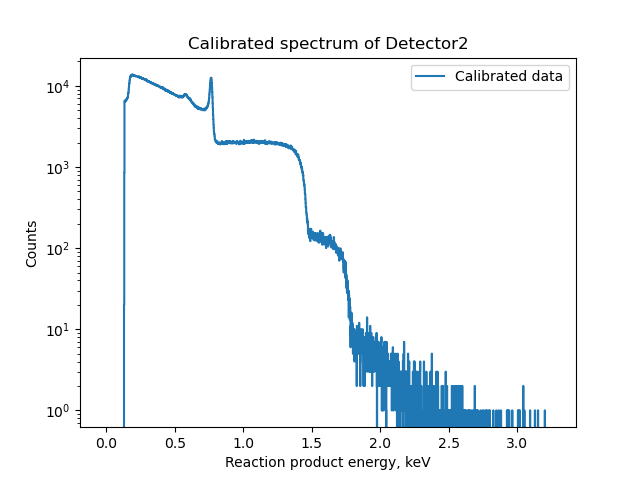

In [9]:
#Execute this cell to plot your calibrated spectra of Detector1 and Detector2

#### NO NEED TO EDIT ####

plt.figure()
plt.step(data_detector1.energy, data_detector1.counts, where='mid', label='Calibrated data')
plt.title("Calibrated spectrum of Detector1") # set title of the plot
plt.xlabel("Reaction product energy, keV")     # set label for x-axis 
plt.ylabel("Counts")          # set label for y-axis 
plt.yscale('log')
plt.legend()                  # enables legend for all plots with a 'label'

plt.figure()
plt.step(data_detector2.energy, data_detector2.counts, where='mid', label='Calibrated data')
plt.title("Calibrated spectrum of Detector2") # set title of the plot
plt.xlabel("Reaction product energy, keV")     # set label for x-axis 
plt.ylabel("Counts")          # set label for y-axis 
plt.yscale('log')
plt.legend()                  # enables legend for all plots with a 'label'


## -> Discussion points 
Make notes about the answer!

* **Question**: Identify what each region corresponds to.

# Measurement 2- After addition of aluminum sheet<a name="load"></a>


## Task 2 Calibrate and normalize the spectra of both detectors of measurements with the aluminum sheet 

In [10]:
#Load your data files here:
data_detector1_aluminum = MCA.load_spectrum("./data/detector1_aluminum.Spe")  ### Detector1 measurement with aluminum foil 
data_detector2_aluminum = MCA.load_spectrum("./data/detector2_aluminum.Spe")  ### Detector2 measurement with aluminum foil 

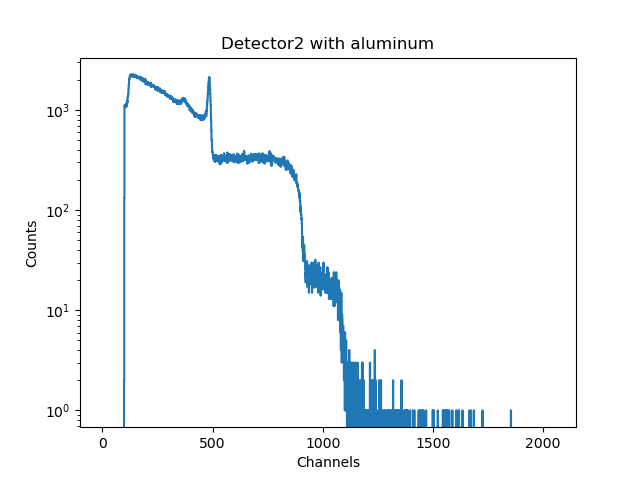

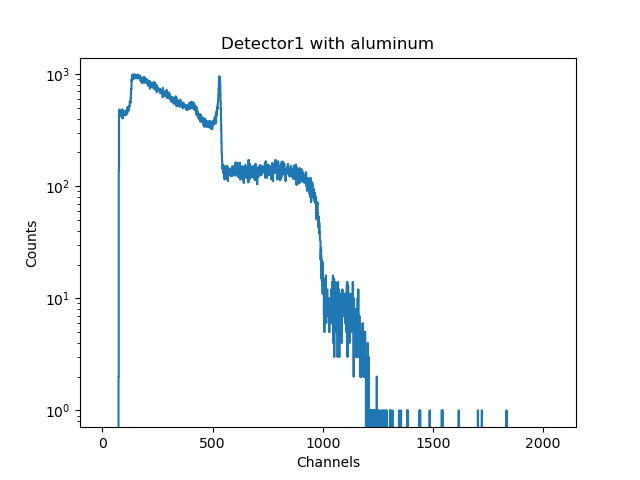

In [11]:
#Execute this cell to plot your spectra of Detector1 and Detector2 after adding the Aluminum sheet

#### NO NEED TO EDIT ####

plt.figure()
plt.step(data_detector1_aluminum.bin_centers, data_detector1_aluminum.counts, where='mid')
plt.title("Detector1 with aluminum") # set title of the plot
plt.xlabel("Channels")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 
plt.yscale('log')

plt.figure()
plt.step(data_detector2_aluminum.bin_centers, data_detector2_aluminum.counts, where='mid')
plt.title("Detector2 with aluminum") # set title of the plot
plt.xlabel("Channels")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 
plt.yscale('log')
plt.show()

#plt.savefig("test_spectrum.png") # This is how you save the figure. Change the extension for different file types such as pdf or png.

## Task 2.1 Energy calibration 

We can use the previous calibration coefficients:

In [12]:
#Execute to calibrate from ADC channels to Energy [keV]

### NO NEED TO EDIT ###
data_detector1_aluminum.calibrate( k_arr[0], m_arr[0]) ### Detector1 calibration
data_detector2_aluminum.calibrate( k_arr[1], m_arr[1]) ### Detector2 calibration 

## Task 2.2 Detector 1 comparison with and without the foil 

### 2.2.1 Time normalization 

Check the duration of both measurements (dead time corrected measurement). You should normalize the measurement with more statistics to the one with less. 

In [13]:
data_detector1.duration # base measurement statistics

4592

In [14]:
data_detector1_aluminum.duration # aluminum measurement statistics

794

In [15]:
### ToDo: uncomment the appropriate option 

# ### Option1: base measurement less statistics 
#norm_scale = data_detector1.duration / data_detector1_aluminum.duration
#data_detector1_aluminum.scale(norm_scale)

### Option2: base measurement more statistics
norm_scale = data_detector1_aluminum.duration / data_detector1.duration
data_detector1.scale(norm_scale)

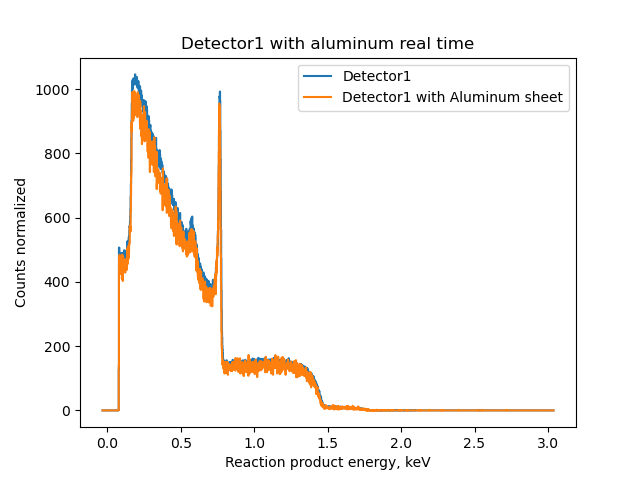

In [16]:
#Execute this cell to plot Detector1 before and after adding the Aluminum sheet 

#### NO NEED TO EDIT ####

plt.figure()
plt.step(data_detector1.energy,data_detector1.counts, where='mid', label='Detector1')
plt.step(data_detector1_aluminum.energy,data_detector1_aluminum.counts, where='mid', label='Detector1 with Aluminum sheet')
plt.title("Detector1 with aluminum real time") # set title of the plot
plt.xlabel("Reaction product energy, keV")     # set label for x-axis 
plt.ylabel("Counts normalized")       # set label for y-axis 
#plt.yscale('log')
plt.legend(loc='upper right')
plt.show()

### 2.2.2 Find the ratio of the the Detector1 before and after the Aluminum sheet

In [17]:
#Execute to find the ratio of statistics before and after adding the aluminum sheet channel by channel

### Optional, you can change the max energy for which you plot the ratio  
E_cut = 1500 

### NO NEED TO EDIT ###
N_bins = len(data_detector1.energy)
ratio = np.zeros(N_bins)

for i in range(N_bins): 
    if (data_detector1.counts[i]!=0 and data_detector1_aluminum.counts[i]!=0 and data_detector1.energy[i] < E_cut):
        ratio[i] = scale * data_detector1_aluminum.counts[i]/data_detector1.counts[i]


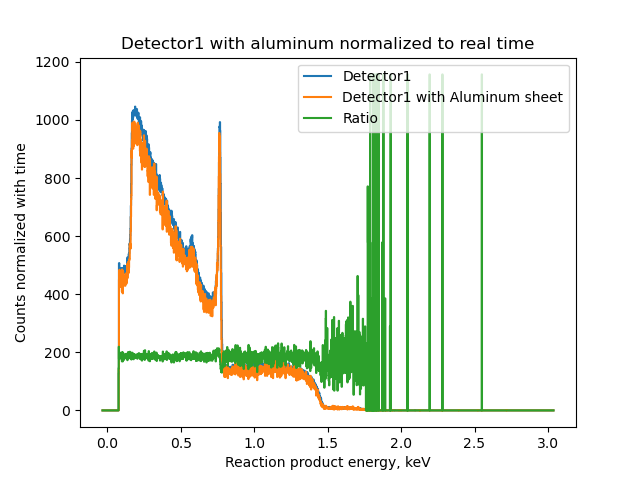

In [18]:
#Execute this cell to plot Detector1 before and after adding aluminum sheet and their ratio

#### NO NEED TO EDIT ####

plt.figure()
plt.step(data_detector1.energy,data_detector1.counts, where='mid', label='Detector1')
plt.step(data_detector1_aluminum.energy,data_detector1_aluminum.counts, where='mid', label='Detector1 with Aluminum sheet')
plt.step(data_detector1_aluminum.energy,ratio, where='mid', label='Ratio')

plt.title("Detector1 with aluminum normalized to real time") # set title of the plot
plt.xlabel("Reaction product energy, keV")     # set label for x-axis 
plt.ylabel("Counts normalized with time")       # set label for y-axis 
#plt.yscale('log')
plt.legend(loc='upper right')
plt.show()

In [19]:
# Choose energy region to count the average ratio value
E_min = 0.2    ### ToDo: choose a good starting energy from the plot above 
E_max = 1.4    ### ToDo: choose a good end point from the plot above 

### NO NEED TO EDIT ###
ratio_sum = 0 
ratio_N = 0

for i in range(N_bins): 
    if (data_detector1.energy[i]>= E_min and data_detector1.energy[i]<=E_max):
        ratio_sum += ratio[i]
        ratio_N += 1

ratio_avg_al = ratio_sum/ratio_N
ratio_avg_al /= scale 

print("Average ratio of two measurements with and without the Aluminum foil for the region [{}, {}] keV is {:.2f}".format(E_min, E_max, ratio_avg_al))

Average ratio of two measurements with and without the Aluminum foil for the region [0.2, 1.4] keV is 0.92


## -> Discussion points 
Make notes about the answer!

* **Question**: What are the effects of adding Aluminum foil for Detector 1? 

## Task 2.3 Detector 2 comparison with and without the foil 

### 2.3.1 Time normalization 

Check the duration of both measurements(dead time corrected measurement). You should normalize the measurement with more statistics to the one with less. 

In [20]:
data_detector2.duration # base measurement statistics

4525

In [21]:
data_detector2_aluminum.duration # aluminum measurement statistics

773

In [22]:
### ToDo: uncomment the appropriate option 
### Option1: base measurement less statistics 
# norm_scale = data_detector2.duration / data_detector2_aluminum.duration
# data_detector2_aluminum.scale(norm_scale)

### Option2: base measurement more statistics
norm_scale = data_detector2_aluminum.duration / data_detector2.duration
data_detector2.scale(norm_scale)

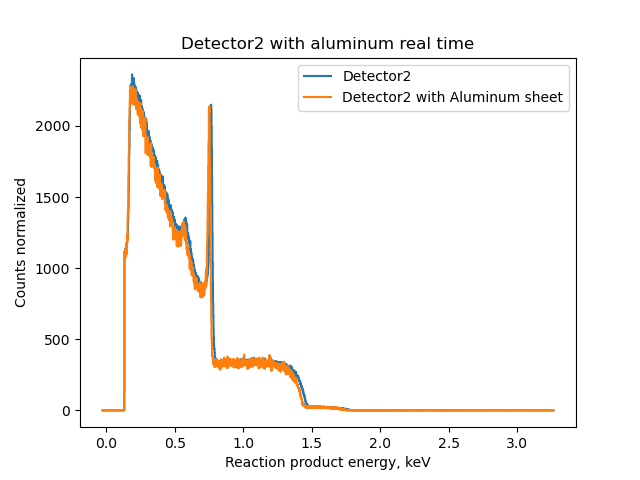

In [23]:
#Execute this cell to plot Detector2 before and after adding the Aluminum sheet 

### NO NEED TO EDIT ### 
plt.figure()
plt.step(data_detector2.energy,data_detector2.counts, where='mid', label='Detector2')
plt.step(data_detector2_aluminum.energy,data_detector2_aluminum.counts, where='mid', label='Detector2 with Aluminum sheet')
plt.title("Detector2 with aluminum real time") # set title of the plot
plt.xlabel("Reaction product energy, keV")     # set label for x-axis 
plt.ylabel("Counts normalized")       # set label for y-axis 
#plt.yscale('log')
plt.legend(loc='upper right')
plt.show()

### 2.3.2 Find the ratio of the the Detector1 before and after the Aluminum sheet

In [24]:
### Optional, you can change the max energy for which you plot the ratio  
E_cut = 1500 

### NO NEED TO EDIT ###
N_bins = len(data_detector1.energy)
ratio = np.zeros(N_bins)
for i in range(N_bins): 
    if (data_detector2.counts[i]!=0 and data_detector2_aluminum.counts[i]!=0 and data_detector2.energy[i] < E_cut):
        ratio[i] = scale * data_detector2_aluminum.counts[i]/data_detector2.counts[i]



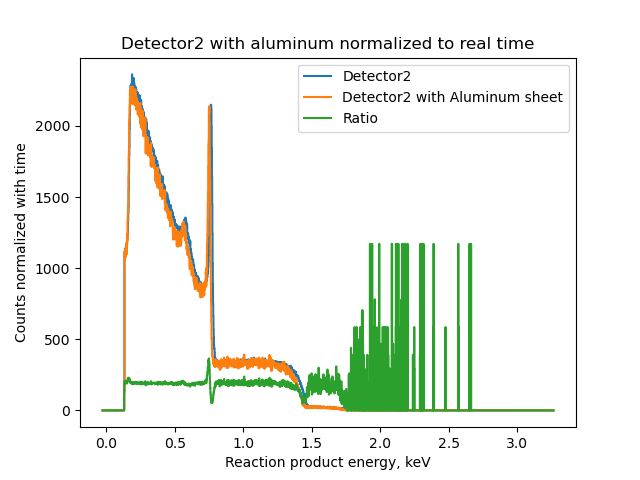

In [25]:
#Execute this cell to plot Detector2 before and after adding aluminum sheet and their ratio

#### NO NEED TO EDIT ####

plt.figure()
plt.step(data_detector2.energy,data_detector2.counts, where='mid', label='Detector2')
plt.step(data_detector2_aluminum.energy,data_detector2_aluminum.counts, where='mid', label='Detector2 with Aluminum sheet')
plt.step(data_detector2_aluminum.energy,ratio, where='mid', label='Ratio')

plt.title("Detector2 with aluminum normalized to real time") # set title of the plot
plt.xlabel("Reaction product energy, keV")     # set label for x-axis 
plt.ylabel("Counts normalized with time")       # set label for y-axis 
#plt.yscale('log')
plt.legend(loc='upper right')
plt.show()

In [26]:
# Choose energy region to count the average ratio value
E_min = 0.2    ### To Do : choose a good starting energy from the plot above 
E_max = 1.4   ### To Do : choose a good end point from the plot above 

### NO NEED TO EDIT ###
ratio_sum = 0 
ratio_N = 0

for i in range(N_bins): 
    if (data_detector2.energy[i]>= E_min and data_detector2.energy[i]<=E_max):
        ratio_sum += ratio[i]
        ratio_N += 1

ratio_avg_al = ratio_sum/ratio_N
ratio_avg_al /= scale 

print("Average ratio of two measurements with and without the Aluminum foil for the region [{} {}] keV is {:.2f} should be 1.00-1.01".format(E_min, E_max, ratio_avg_al), )

Average ratio of two measurements with and without the Aluminum foil for the region [0.2 1.4] keV is 0.95 should be 1.00-1.01


## -> Discussion points 
Make notes about the answer!

* **Question**: What are the effects of adding Aluminum foil on the Detector 2? 

## Measurement 3- After addition of Cadmium sheet<a name="load"></a>

First we need to reload the base measurement for the code to work properly:

In [27]:
### RELOAD BASE MEASUREMENT ### 

data_detector1 = MCA.load_spectrum("data/detector1_base.Spe") # Insert name of the base measurement, detector1
data_detector2 = MCA.load_spectrum("data/detector2_base.Spe") # Insert name of the base measurement, detector2

### NO NEED TO EDIT ###

data_detector1.calibrate( k_arr[0], m_arr[0]) # Calibration Detector1
data_detector2.calibrate( k_arr[1], m_arr[1]) # Calibration Detector2

################################

Now load the spectra taken with the detectors after adding the Cadmium sheet

In [28]:
#Load your data files here:
data_detector1_cadmium = MCA.load_spectrum("data/detector1_cadmium.Spe")  ## ToDo: Inset name of the file with Detector1 with Cadmium sheet measurement
data_detector2_cadmium = MCA.load_spectrum("data/detector2_cadmium.Spe")  ## ToDo: Inset name of the file with Detector2 with Cadmium sheet measuremen

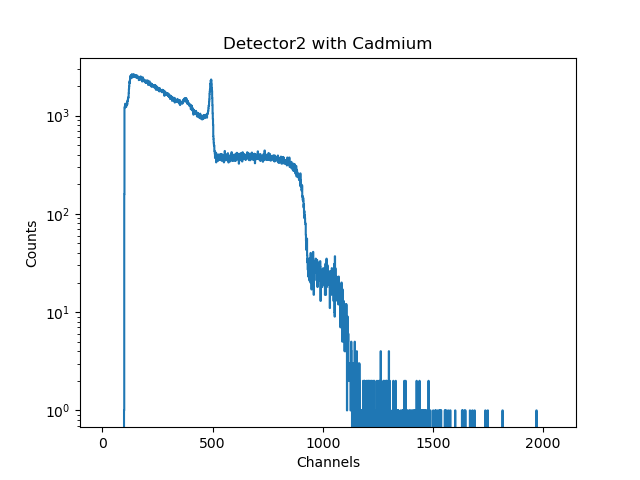

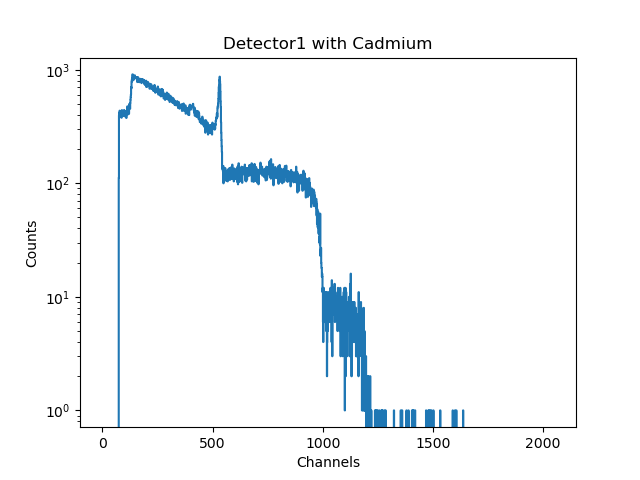

In [29]:
#Execute this cell to plot Detector1 and Detector2 after adding the Cadmium sheet 

### NO NEED TO EDIT ### 

plt.figure()
plt.step(data_detector1_cadmium.bin_centers,data_detector1_cadmium.counts, where='mid')

plt.title("Detector1 with Cadmium") # set title of the plot
plt.xlabel("Channels")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 
plt.yscale('log')

plt.figure()
plt.step(data_detector2_cadmium.bin_centers, data_detector2_cadmium.counts, where='mid')
plt.yscale('log')

plt.title("Detector2 with Cadmium") # set title of the plot
plt.xlabel("Channels")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 

plt.show()

#plt.savefig("test_spectrum.png") # This is how you save the figure. Change the extension for different file types such as pdf or png.

## Task 3.1 Energy calibration 

We can use the previous calibration coefficients:

In [30]:
#Execute to calibrate from channels to Energy [keV]

#### NO NEED TO EDIT ####

data_detector1_cadmium.calibrate( k_arr[0], m_arr[0]) ### Detector1 with Cadmium
data_detector2_cadmium.calibrate( k_arr[1], m_arr[1]) ### Detector2 with Cadmium

## Task 3.2 Detector 1 comparison with and without the Cadmium block 

### 3.2.1 Time normalization 

Check the duration of both measurements (dead time corrected measurement). You should normalize the measurement with more statistics to the one with less. 

In [31]:
data_detector1.duration # base measurement statistics

4592

In [32]:
data_detector1_cadmium.duration # cadmium measurement statistics

952

In [33]:
# ### ToDo: uncomment the appropriate option 
# ### Option1: base measurement less statistics 
# norm_scale = data_detector1.duration / data_detector1_cadmium.duration
# data_detector1_aluminum.scale(norm_scale)

### Option2: base measurement more statistics
norm_scale = data_detector1_cadmium.duration / data_detector1.duration
data_detector1.scale(norm_scale)

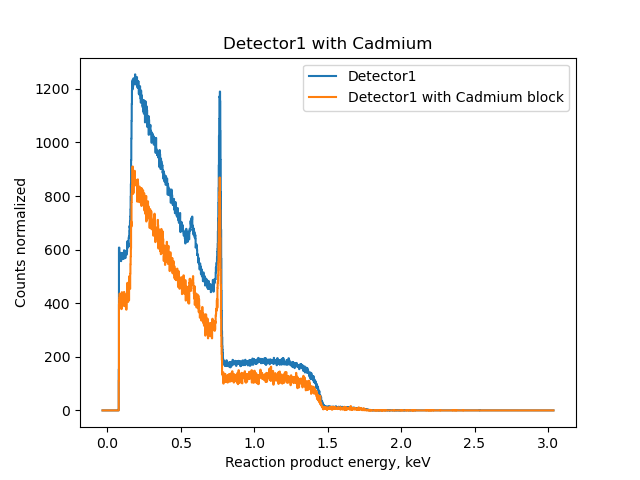

In [34]:
#Execute this cell to plot Detector1 before and after adding the Cadmium sheet 

### NO NEED TO EDIT ### 

plt.figure()
plt.step(data_detector1.energy,data_detector1.counts, where='mid', label='Detector1')
plt.step(data_detector1_cadmium.energy,data_detector1_cadmium.counts, where='mid', label='Detector1 with Cadmium block')
plt.title("Detector1 with Cadmium") # set title of the plot
plt.xlabel("Reaction product energy, keV")     # set label for x-axis 
plt.ylabel("Counts normalized")       # set label for y-axis 
#plt.yscale('log')
plt.legend(loc='upper right')
plt.show()

### 3.2.2 Find the ratio of the the Detector1 before and after the Cadmium sheet

In [35]:
### Optional, you can change the max energy for which you plot the ratio  
E_cut = 1500 

### NO NEED TO EDIT ###
N_bins = len(data_detector1.energy)
ratio = np.zeros(N_bins)

for i in range(N_bins): 
    if (data_detector1.counts[i]!=0 and data_detector1_cadmium.counts[i]!=0 and data_detector1.energy[i] < E_cut):
        ratio[i] = scale * data_detector1_cadmium.counts[i]/data_detector1.counts[i]


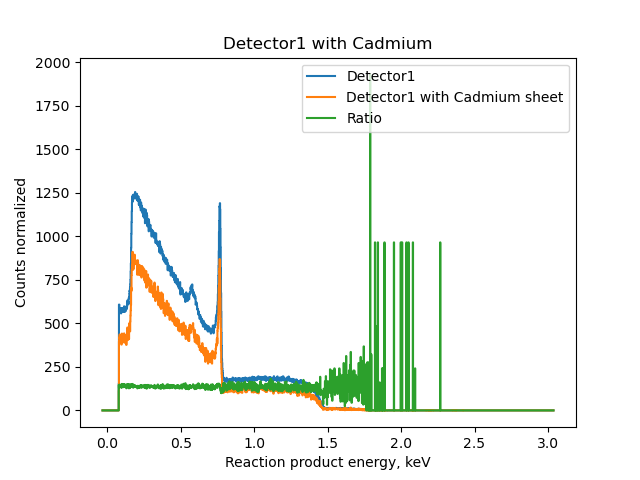

In [36]:
#Execute this cell to plot Detector1 before and after adding the Cadmium block with their ratio

### NO NEED TO EDIT ###
plt.figure()
plt.step(data_detector1.energy,data_detector1.counts, where='mid', label='Detector1')
plt.step(data_detector1_cadmium.energy,data_detector1_cadmium.counts, where='mid', label='Detector1 with Cadmium sheet')
plt.step(data_detector1_cadmium.energy,ratio, where='mid', label='Ratio')

plt.title("Detector1 with Cadmium") # set title of the plot
plt.xlabel("Reaction product energy, keV")     # set label for x-axis 
plt.ylabel("Counts normalized")       # set label for y-axis 
#plt.yscale('log')
plt.legend(loc='upper right')
plt.show()

In [37]:
# Choose energy region to count the average ratio value
E_min = 0.2   ### To Do : choose a good starting energy from the plot above 
E_max = 1.4   ### To Do : choose a good end point from the plot above 


### NO NEED TO EDIT ###

ratio_sum = 0 
ratio_N = 0

for i in range(N_bins): 
    if (data_detector1.energy[i]>= E_min and data_detector1.energy[i]<=E_max):
        ratio_sum += ratio[i]
        ratio_N += 1

ratio_avg_al = ratio_sum/ratio_N
ratio_avg_al /= scale 

print("Average ratio of two measurements with and without the Cadmium block for the region [{} {}] keV is {:.2f}".format(E_min, E_max, ratio_avg_al))


Average ratio of two measurements with and without the Cadmium block for the region [0.2 1.4] keV is 0.68


## -> Discussion points 
Make notes about the answer!

* **Question**: What are the effects of adding Cadmium sheet? 

## Task 3.3 Detector 2 comparison with and without Cadmium sheet 

### 3.3.1 Time normalization 

Check the duration of both measurements (dead time corrected measurement). You should normalize the measurement with more statistics to the one with less. 

In [38]:
data_detector2.duration # base measurement statistics

4525

In [39]:
data_detector2_cadmium.duration # cadmium measurement statistics

933

In [40]:
### ToDo: uncomment the appropriate option 
### Option1: base measurement less statistics 
#norm_scale = data_detector2.duration / data_detector2_cadmium.duration
#data_detector2_cadmium.scale(norm_scale)

### Option2: base measurement more statistics
norm_scale = data_detector2_cadmium.duration / data_detector2.duration
data_detector2.scale(norm_scale)

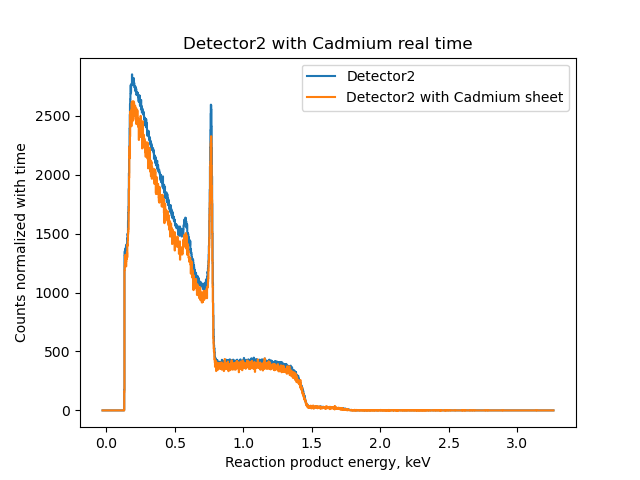

In [41]:
#Execute this cell to plot Detector2 before and after adding the Cadmium sheet 

### NO NEED TO EDIT ### 

plt.figure()
plt.step(data_detector2.energy,data_detector2.counts, where='mid', label='Detector2')
plt.step(data_detector2_cadmium.energy,data_detector2_cadmium.counts, where='mid', label='Detector2 with Cadmium sheet')
plt.title("Detector2 with Cadmium real time") # set title of the plot
plt.xlabel("Reaction product energy, keV")     # set label for x-axis 
plt.ylabel("Counts normalized with time")       # set label for y-axis 
#plt.yscale('log')
plt.legend(loc='upper right')
plt.show()

### 3.3.2 Find the ratio of the the Detector2 before and after the Cadmium sheet

In [42]:
### Optional, you can change the max energy for which you plot the ratio  
E_cut = 1500 

### NO NEED TO EDIT ###
N_bins = len(data_detector1.energy)
ratio = np.zeros(N_bins)
for i in range(N_bins): 
    if (data_detector2.counts[i]!=0 and data_detector2_cadmium.counts[i]!=0 and data_detector2.energy[i] < E_cut):
        ratio[i] = scale * data_detector2_cadmium.counts[i]/data_detector2.counts[i]



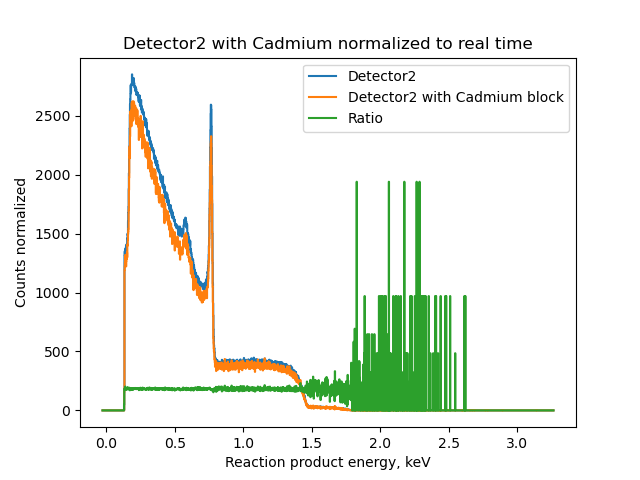

In [43]:
#Execute this cell to plot Detector2 before and after adding the Cadmium block with their ratio

### NO NEED TO EDIT ### 

plt.figure()
plt.step(data_detector2.energy,data_detector2.counts, where='mid', label='Detector2')
plt.step(data_detector2_cadmium.energy,data_detector2_cadmium.counts, where='mid', label='Detector2 with Cadmium block')
plt.step(data_detector2_aluminum.energy,ratio, where='mid', label='Ratio')

plt.title("Detector2 with Cadmium normalized to real time") # set title of the plot
plt.xlabel("Reaction product energy, keV")     # set label for x-axis 
plt.ylabel("Counts normalized")       # set label for y-axis 
#plt.yscale('log')
plt.legend(loc='upper right')
plt.show()

In [44]:
# Choose energy region to count the average ratio value
E_min = 0.2    ### To Do : choose a good starting energy from the plot above 
E_max = 1.4    ### To Do : choose a good end point from the plot above 


### NO NEED TO EDIT ###

ratio_sum = 0 
ratio_N = 0

for i in range(N_bins): 
    if (data_detector2.energy[i]>= E_min and data_detector2.energy[i]<=E_max):
        ratio_sum += ratio[i]
        ratio_N += 1

ratio_avg_al = ratio_sum/ratio_N
ratio_avg_al /= scale 

print("Average ratio of two measurements with and without the Cadmium block for the region [{} {}] keV is {:.2f}".format(E_min, E_max, ratio_avg_al))



Average ratio of two measurements with and without the Cadmium block for the region [0.2 1.4] keV is 0.91


## -> Discussion points 
Make notes about the answer!

* **Question**: What are the effects of adding Cadmium sheet on the Detector2? 

# Task 4 - Branching $^7$Li <a name="load"></a>

For this task we want to sum statistics for all measurements that we did with Detector1: base measurement + measurement with Aluminum sheet + measurement with Cadmium sheet.

In [57]:
### We start with the base measurement 
### LOAD THE BASE MEASUREMENT ### 
data_detector1_sum = MCA.load_spectrum("data/detector1_base.Spe") # Insert name of the base measurement, detector1

### NO NEED TO EDIT ###
data_detector1_sum.calibrate( k_arr[0], m_arr[0])

In [58]:
# Execute this cell to sum statistics of all measurements with the Detector1

### NO NEED TO EDIT ###
### Sum statistics of all measurements 
data_detector1_sum.counts = data_detector1_sum.counts + data_detector1_aluminum.counts
data_detector1_sum.counts = data_detector1_sum.counts + data_detector1_cadmium.counts

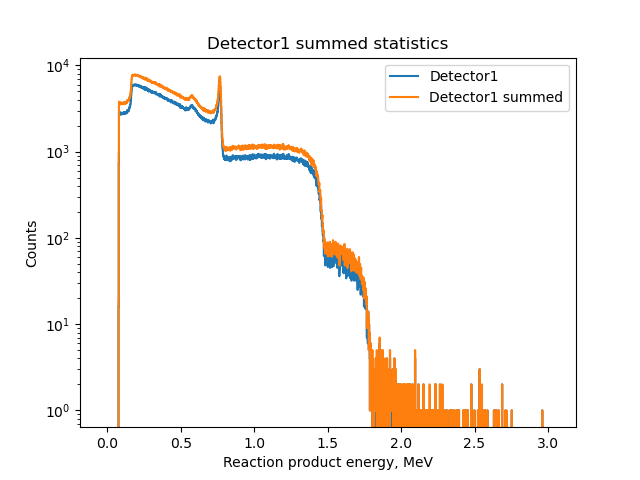

In [61]:
# Execute this cell plot the base measurement vs all three measurements together with Detector1

### NO NEED TO EDIT ### 

plt.figure()
plt.step(data_detector1.energy,data_detector1.counts, where='mid', label='Detector1')
plt.step(data_detector1_sum.energy,data_detector1_sum.counts, where='mid', label='Detector1 summed')

plt.title("Detector1 summed statistics") # set title of the plot
plt.xlabel("Reaction product energy, MeV")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 
plt.yscale('log')
plt.legend(loc='upper right')
plt.show()

In [64]:
# Choose energy region to count the average ratio value
### Select good energy regio from the histogram 
E_min = 0.78     ### ToDo : choose a good starting energy from the plot above 
E_max = 1.8    ### ToDo : choose a good end point from the plot above 

E_replace_total = 0.8     ### Select the max E for which counts need to be "replaced" for the total spectrum (x value of first point)
A_replace_total = 1135      ### Select counts value value with which to replace (y value of first point)

E_replace_ground = 1.48     ### Select the max E for which counts need to be "replaced" for the ground state spectrum (x value of second point)
A_replace_ground = 74     ### Select counts value value with which to replace (y value of second point) 

### NO NEED TO EDIT ### 

counts_total = np.zeros(N_bins)
counts_ground = np.zeros(N_bins)

counts_total_sum = 0 
counts_ground_sum = 0

for i in range(N_bins): 
    if (data_detector1_sum.energy[i]>= E_min and data_detector1_sum.energy[i]<=E_max):
        ### total 
        if (data_detector1_sum.energy[i] < E_replace_total):
            counts_total[i] = A_replace_total
        else: 
            counts_total[i] = data_detector1_sum.counts[i]
        ### ground state 
        if (data_detector1_sum.energy[i] < E_replace_ground):
            counts_ground[i] = A_replace_ground
        else: 
            counts_ground[i] = data_detector1_sum.counts[i]
        counts_total_sum += counts_total[i]
        counts_ground_sum += counts_ground[i]

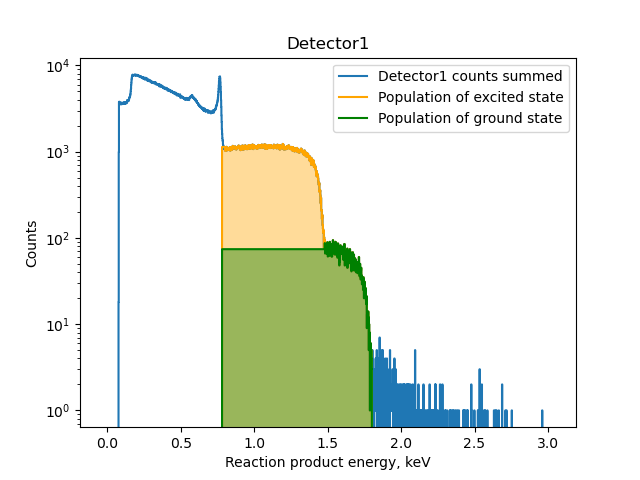

In [65]:
# Execute to plot population of the excited and ground state 

### NO NEED TO EDIT ### 
plt.figure()
plt.step(data_detector1_sum.energy,data_detector1_sum.counts, where='mid', label='Detector1 counts summed')
plt.step(data_detector1.energy,counts_total, where='mid', label='Population of excited state', color="orange")
plt.step(data_detector1.energy,counts_ground, where='mid', label='Population of ground state', color="green")

plt.fill_between(data_detector1.energy,counts_total, step="mid", alpha=0.4, color="orange")
plt.fill_between(data_detector1.energy,counts_ground, step="mid", alpha=0.4, color="green")


plt.title("Detector1") # set title of the plot
plt.xlabel("Reaction product energy, keV")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 
plt.yscale('log')
plt.legend(loc='upper right')
plt.show()

In [66]:
# Execute to find the ratio

### NO NEED TO EDIT ### 

print("Sum of the counts total {}".format(counts_total_sum))
print("Sum of the counts ground state {}".format(counts_ground_sum))

ratio_ground_total = counts_ground_sum / counts_total_sum

print("The ratio {:.2f}".format(ratio_ground_total))

Sum of the counts total 483189.0
Sum of the counts ground state 46014.0
The ratio 0.10


## Measurement 4, Task 5- Change of detector position<a name="load"></a>


First we need to reload the base measurement for the code to work properly:

In [46]:
### RELOAD BASE MEASUREMENT ### 

data_detector1 = MCA.load_spectrum("data/detector1_base.Spe") # Insert name of the base measurement, detector1
data_detector2 = MCA.load_spectrum("data/detector2_base.Spe") # Insert name of the base measurement, detector2

### NO NEED TO EDIT ###

data_detector1.calibrate( k_arr[0], m_arr[0]) # Calibration Detector1
data_detector2.calibrate( k_arr[1], m_arr[1]) # Calibration Detector2

################################

Now load the new measurement with Detector2 in Position2:

In [47]:
data_detector2_position2 = MCA.load_spectrum("data/detector2_d2_1.Spe")  ## ToDo: insert your filename

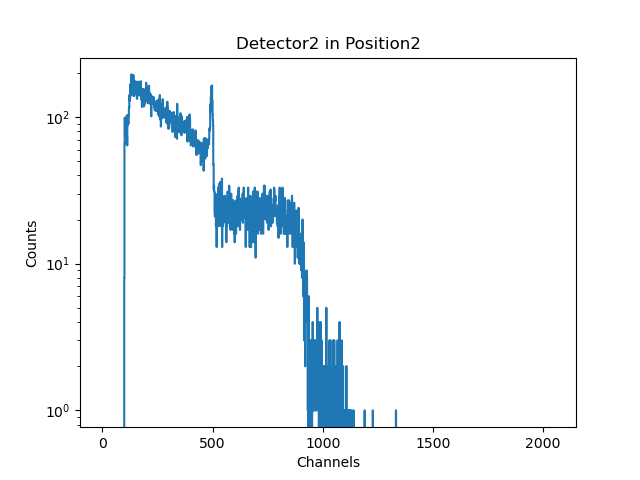

In [48]:
#Execute this cell to plot Detector2 in the second position

### NO NEED TO EDIT ### 

plt.figure()
plt.step(data_detector2_position2.bin_centers,data_detector2_position2.counts, where='mid')

plt.title("Detector2 in Position2") # set title of the plot
plt.xlabel("Channels")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 
plt.yscale('log')


#plt.savefig("test_spectrum.png") # This is how you save the figure. Change the extension for different file types such as pdf or png.

## Task 5.1 Energy calibration 

We can use the previous calibration coefficients:

In [49]:
#Execute to calibrate the new measurement

### NO NEED TO EDIT ### 
data_detector2_position2.calibrate( k_arr[1], m_arr[1])

## Task 5.2 Detector 2 comparison in Position 1 and Position 2

### 5.2.1 Time normalization 

Check the duration of both measurements (dead time corrected measurements). You should normalize the measurement with more statistics to the one with less. 

In [50]:
data_detector2.duration # base measurement statistics

4525

In [51]:
data_detector2_position2.duration # position 2 detector 2 measurement statistics

158

In [52]:
### ToDo: uncomment the appropriate option 
### Option1: base measurement less statistics 
#norm_scale = data_detector2.duration / data_detector2_position2.duration
#data_detector2_position2.scale(norm_scale)

### Option2: base measurement more statistics
norm_scale = data_detector2_position2.duration / data_detector2.duration
data_detector2.scale(norm_scale)

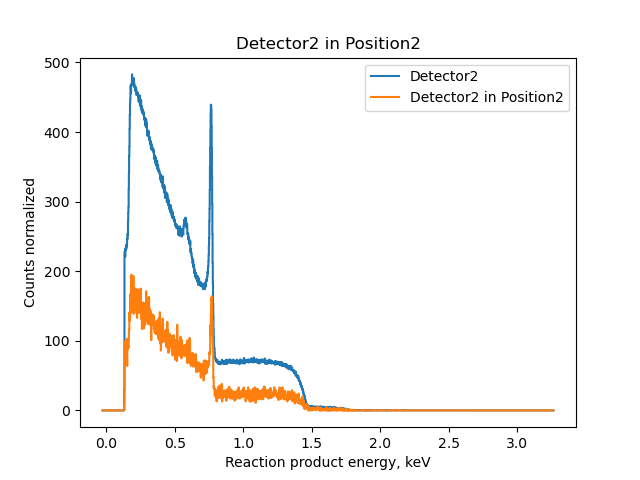

In [53]:
#Execute this cell to plot Detector2 in the position1 vs position2

### NO NEED TO EDIT ### 

plt.figure()
plt.step(data_detector2.energy,data_detector2.counts, where='mid', label='Detector2')
plt.step(data_detector2_position2.energy,data_detector2_position2.counts, where='mid', label='Detector2 in Position2')
plt.title("Detector2 in Position2") # set title of the plot
plt.xlabel("Reaction product energy, keV")     # set label for x-axis 
plt.ylabel("Counts normalized")       # set label for y-axis 
#plt.yscale('log')
plt.legend(loc='upper right')
plt.show()

### 5.2.2 Find the ratio of the the Detector2 in Position 1 and Position 2

In [54]:
### Optional, you can change the max energy for which you plot the ratio  
E_cut = 1500 

### NO NEED TO EDIT ###
N_bins = len(data_detector2.energy)
ratio = np.zeros(N_bins)

for i in range(N_bins): 
    if (data_detector2.counts[i]!=0 and data_detector2_position2.counts[i]!=0 and data_detector2.energy[i] < E_cut):
        ratio[i] = scale * data_detector2_position2.counts[i]/data_detector2.counts[i]


/var/folders/nn/gn8yy_914qx59tnsqnjpb7r40000gn/T/ipykernel_98882/3199628108.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


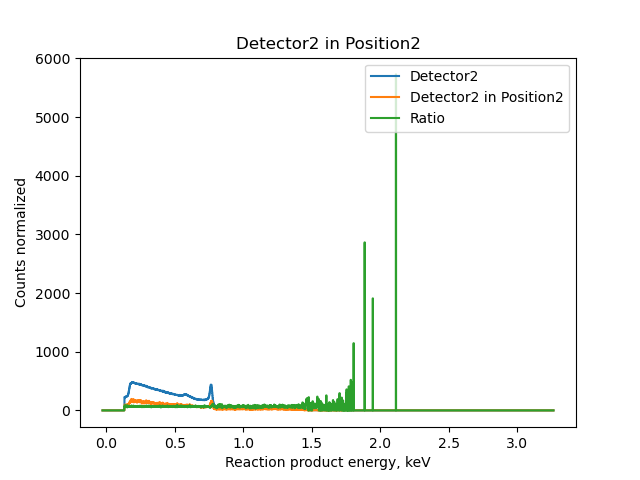

In [55]:
#Execute this cell to plot Detector2 in the position1 vs position2 with their ratio

### NO NEED TO EDIT ### 

plt.figure()
plt.step(data_detector2.energy,data_detector2.counts, where='mid', label='Detector2')
plt.step(data_detector2_position2.energy,data_detector2_position2.counts, where='mid', label='Detector2 in Position2')
plt.step(data_detector2_position2.energy,ratio, where='mid', label='Ratio')

plt.title("Detector2 in Position2") # set title of the plot
plt.xlabel("Reaction product energy, keV")     # set label for x-axis 
plt.ylabel("Counts normalized")       # set label for y-axis 
#plt.yscale('log')
plt.legend(loc='upper right')
plt.show()

In [56]:
# Choose energy region to count the average ratio value
E_min = 0.2    ### ToDo : choose a good starting energy from the plot above 
E_max = 1.4    ### ToDo : choose a good end point from the plot above 

### NO NEED TO EDIT ###

ratio_sum = 0 
ratio_N = 0

for i in range(N_bins): 
    if (data_detector2.energy[i]>= E_min and data_detector2.energy[i]<=E_max):
        ratio_sum += ratio[i]
        ratio_N += 1

ratio_avg_al = ratio_sum/ratio_N
ratio_avg_al /= scale 

print("Average ratio of two measurements in Position1 and Position2 for the region [{} {}] keV is {:.2f}".format(E_min, E_max, ratio_avg_al))

Average ratio of two measurements in Position1 and Position2 for the region [0.2 1.4] keV is 0.34


## -> Discussion points 
Make notes about the answer!

* **Question**: What are the effects of adding distance? 

# Measurement 6- BGO detector <a name="load"></a>

## Task 6.1 Load data and calibrate the detector 
Note that the calibration coefficients are already given to you 

In [78]:
data_BGO = MCA.load_spectrum("./data/BGO_example.Spe") ### ToDo: Insert the name of BGO spectrum

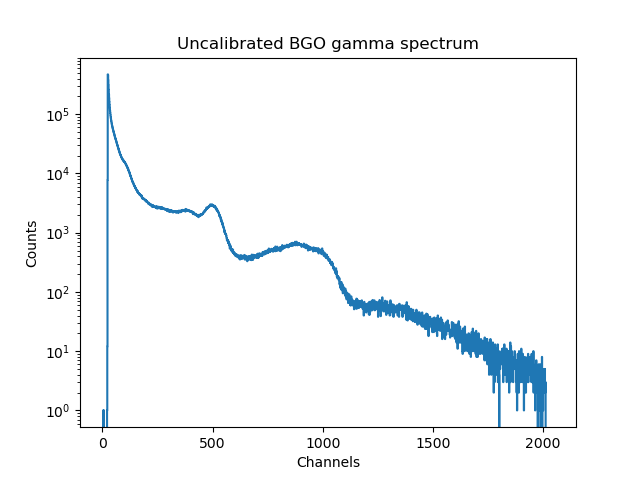

In [79]:
# Execute to plot uncalibrated BGO spectrum

### NO NEED TO EDIT ### 

plt.figure()
plt.step(data_BGO.bin_centers,data_BGO.counts, where='mid')

plt.title("Uncalibrated BGO gamma spectrum") # set title of the plot
plt.xlabel("Channels")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 
plt.yscale('log')

plt.show()

In [80]:
data_BGO.calibrate(4.448015, 0 ) ### ToDo: Insert calibration values from the .Spe file values under $ENER_FIT (INVERT THEM)

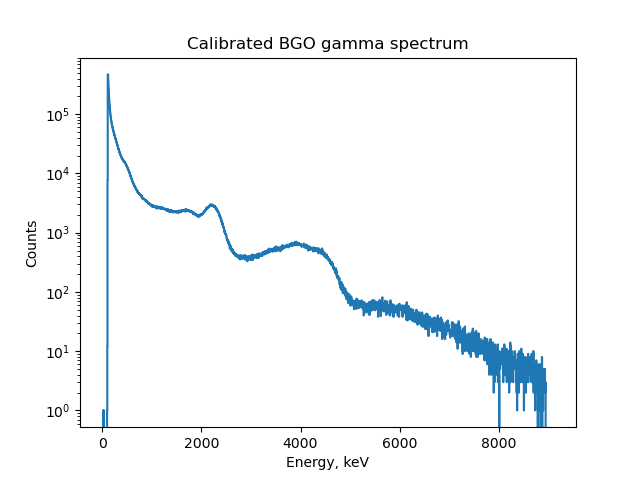

In [81]:
# Execute to plot calibrated BGO spectrum

### NO NEED TO EDIT ### 
plt.figure()
plt.step(data_BGO.energy,data_BGO.counts, where='mid')

plt.title("Calibrated BGO gamma spectrum") # set title of the plot
plt.xlabel("Energy, keV")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 
plt.yscale('log')

plt.show()
#plt.savefig("BGO_calibrated.png") # This is how you save the figure. Change the extension for different file types such as pdf or png.

## -> Discussion points 
Make notes about the answer!

* **Question**: Where gamma rays are emitted from? 
* **Question**: What is the energy of the "bump" to the left? 

<span style="font-weight:700;font-size:20px"> 
NOTE:  Save calibrate BGO spectrum and bring it to the gamma lab. More detailed discussion of the features of the spectrum will be done during the gamma lab.
</span>